<a href="https://colab.research.google.com/github/Dana1402/NeuralNetworksScripts/blob/main/multy_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.losses import sparse_categorical_crossentropy

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images = train_images.reshape(train_images.shape[0], -1).astype('float32') / 255.
test_images = test_images.reshape(test_images.shape[0], -1).astype('float32') / 255.

In [ ]:
model = models.Sequential()
model.add(tf.keras.layers.Dense(32, activation = 'relu', input_shape= (len(train_images[0]),)))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

sparce_categorical_crossentropy - используется с целочисленными метками

In [ ]:
model.compile(optimizer = 'rmsprop', 
              loss=sparse_categorical_crossentropy, 
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_images, 
                    train_labels, 
                    epochs = 20, 
                    batch_size = 512, 
                    validation_data = (test_images, test_labels))

Epoch 1/20
118/118 [==============================] - 1s 7ms/step - loss: 0.8052 - accuracy: 0.7862 - val_loss: 0.4015 - val_accuracy: 0.8945
Epoch 2/20
118/118 [==============================] - 1s 6ms/step - loss: 0.3369 - accuracy: 0.9075 - val_loss: 0.2873 - val_accuracy: 0.9220
Epoch 3/20
118/118 [==============================] - 1s 6ms/step - loss: 0.2680 - accuracy: 0.9246 - val_loss: 0.2504 - val_accuracy: 0.9271
Epoch 4/20
118/118 [==============================] - 1s 6ms/step - loss: 0.2324 - accuracy: 0.9344 - val_loss: 0.2313 - val_accuracy: 0.9330
Epoch 5/20
118/118 [==============================] - 1s 6ms/step - loss: 0.2078 - accuracy: 0.9413 - val_loss: 0.2203 - val_accuracy: 0.9369
Epoch 6/20
118/118 [==============================] - 1s 6ms/step - loss: 0.1898 - accuracy: 0.9464 - val_loss: 0.1989 - val_accuracy: 0.9432
Epoch 7/20
118/118 [==============================] - 1s 6ms/step - loss: 0.1753 - accuracy: 0.9498 - val_loss: 0.1917 - val_accuracy: 0.9425
Epoch 

# Visialization

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
def visualize_loss(history):
  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']

  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']

  epochs = range(1, len(history_dict['accuracy']) + 1)

  plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
  plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')

  plt.plot(epochs, acc_values, 'bo', label = 'Training acc', c = 'red')
  plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc', c = 'red')

  plt.title('Training and validation loss/accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Loss,accuracy')
  plt.legend()

  plt.show()

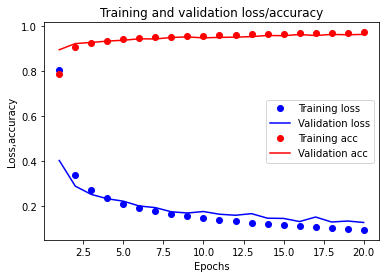

In [ ]:
visualize_loss(history)

In [ ]:
def show_mnist(images, labels, predicted_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if predicted_labels is not None:
            title_obj = plt.title(f"Real: {labels[i]}. Pred: {predicted_labels[i].argmax()}")
            if labels[i] != predicted_labels[i].argmax():
                plt.setp(title_obj, color='r')
        else:
            plt.title(f"Real label: {labels[i]}")

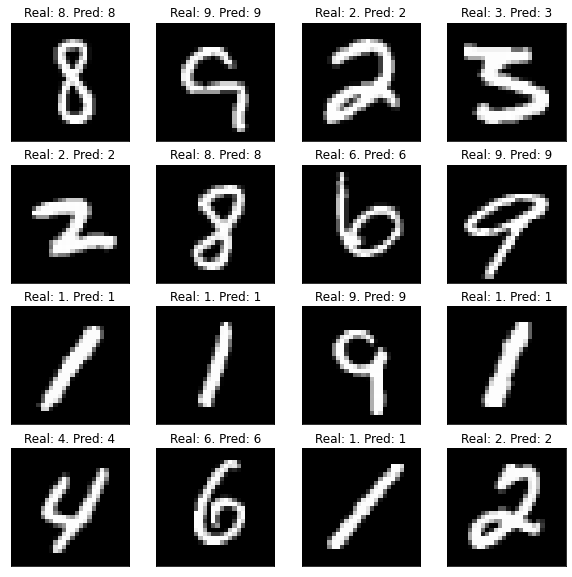

In [ ]:
predicted_labels = model.predict(test_images)
idxs = np.random.choice(np.arange(len(test_images)), 16, replace=False)
show_mnist(test_images[idxs].reshape((-1, 28, 28)), test_labels[idxs], predicted_labels[idxs])